In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

#decimal = "," - иначе запятые весто точек разделители
#https://legkovopros.ru/questions/25317/python-pandaz-pravil-ny-j-sposob-izmenit-desyatichnuyu-zapyatuyu-na-desyatichnuyu-tochku-v-pandaz-dataframe-dublikat

data = pd.read_csv('C:/Users/User/PYTHON/данные/test_data.csv', decimal = ",")

In [2]:
#исследуем, как коррелируют между собой данные

corr = data.drop('Campaign_id', axis = 1).corr()
corr.style.background_gradient(cmap = 'coolwarm')

,Impressions,Clicks,Installs,Registrations,Spend,Revenue_ad1d,Revenue_in_app1d,Payers1d,Revenue_ad7d,Revenue_in_app7d,Payers7d,Revenue_ad30d,Revenue_in_app30d,Payers30d
Impressions,1.000000,0.992680,0.997102,0.995874,0.850459,0.741610,0.863525,0.895288,0.673468,0.866330,0.902854,0.620180,0.838837,0.895672
Clicks,0.992680,1.000000,0.989069,0.989849,0.837281,0.727475,0.884682,0.913572,0.659492,0.876716,0.919847,0.606434,0.850469,0.911863
Installs,0.997102,0.989069,1.000000,0.998247,0.867692,0.765664,0.860372,0.893469,0.700284,0.868809,0.900617,0.648191,0.843695,0.893902
Registrations,0.995874,0.989849,0.998247,1.000000,0.866191,0.765926,0.864778,0.895188,0.702225,0.870924,0.901886,0.651246,0.847528,0.895719
Spend,0.850459,0.837281,0.867692,0.866191,1.000000,0.976967,0.892586,0.906705,0.952398,0.934936,0.905260,0.924306,0.934839,0.907815
Revenue_ad1d,0.741610,0.727475,0.765664,0.765926,0.976967,1.000000,0.836885,0.839503,0.994012,0.891370,0.835531,0.979470,0.902108,0.841582
Revenue_in_app1d,0.863525,0.884682,0.860372,0.864778,0.892586,0.836885,1.000000,0.974341,0.799277,0.984887,0.975407,0.768704,0.975856,0.974602
Payers1d,0.895288,0.913572,0.893469,0.895188,0.906705,0.839503,0.974341,1.000000,0.795231,0.967541,0.997641,0.752631,0.965035,0.996090
Revenue_ad7d,0.673468,0.659492,0.700284,0.702225,0.952398,0.994012,0.799277,0.795231,1.000000,0.858215,0.789493,0.993977,0.875412,0.798020
Revenue_in_app7d,0.866330,0.876716,0.868809,0.870924,0.934936,0.891370,0.984887,0.967541,0.858215,1.000000,0.968930,0.827335,0.990826,0.969563


In [ ]:
@ Анализ по регионам

In [ ]:
@КАМПАНИИ В КАКИХ ГЕО ПОКАЗАЛИ СЕБЯ ХУЖЕ ВСЕГО?

In [35]:
#создадим необходимые переменые

#CPC (Cost Per Click), стоимость клика = стоимость рекламы/количество кликов
data['CPC'] = data['Spend']/data['Clicks']

#CR (Conversion Ratio), коэффициент конверсии = целевого действия/всего взаимодействий
data['CR'] = data['Registrations']/data['Impressions']

#RPC (Revenue Per Click), доход с каждого клика = весь доход от рекламной кампании/количество кликов
data['RPC_30d'] = (data['Revenue_ad30d'] + data['Revenue_in_app30d'])/data['Clicks']
data['RPC_7d'] = (data['Revenue_ad7d'] + data['Revenue_in_app7d'])/data['Clicks']

data_plot = data.groupby('Geo', as_index = False).aggregate({'CPC' : 'mean', 'CR' : 'mean', 'RPC_30d' : 'mean', 'RPC_7d' : 'mean'})


#построим графики показателей с разбивкой на регион

data_plot = data_plot.sort_values('CPC', ascending = True)
fig = px.bar(data_plot, x = ['RPC_30d','CPC'], y = 'Geo', 
             labels = {'Geo':'', 'value': 'mean CPC & mean monthly RPC'}, 
             width = 700, height = 400, color_discrete_map = {'RPC_30d': '#85C9FF','CPC': '#636efa'})
fig.show()


#closer look
shorten = data_plot[(data_plot['Geo'] == 'north africa') | 
                    (data_plot['Geo'] == 'tropical africa') | 
                    (data_plot['Geo'] == 'latin america')]
fig = px.bar(shorten, x = ['RPC_30d','CPC'], y = 'Geo', 
             labels = {'Geo':'', 'value': 'mean CPC & mean monthly RPC'}, 
             width = 700, height = 400, color_discrete_map = {'RPC_30d': '#85C9FF','CPC': '#636efa'})
fig.show()

data_plot1 = data_plot.sort_values('CR', ascending = True)
fig = px.bar(data_plot1, x = 'CR', y = 'Geo', labels = {'CR':'mean CR (registrations to views)', 'Geo':''}, width = 700, height = 400)
fig.update_traces(marker_color = '#7FD4C1')
fig.show()

In [ ]:
@КАК РАЗЛИЧАЕТСЯ КОНВЕРСИЯ ПО РЕГИОНАМ?

In [32]:
#CR (Conversion Ratio), коэффициент конверсии = целевого действия/всего взаимодействий
data['CR_registr'] = data['Registrations']/data['Impressions']
data['CR_clicks'] = data['Clicks']/data['Impressions']

data.groupby('Geo', as_index = False).aggregate({'CR_registr' : 'mean', 'CR_clicks' : 'mean'}).sort_values('CR_registr', ascending = False)

,Geo,CR_registr,CR_clicks
4,north america,0.007101,0.033939
2,latin america,0.006900,0.036618
3,north africa,0.006673,0.029434
5,tropical africa,0.005336,0.030090
6,western europe,0.004899,0.023480
0,australia oceania,0.004119,0.024256
1,cis,0.004033,0.024728


In [ ]:
@КАК РАЗЛИЧАЕТСЯ СТОИМОСТЬ КЛИКА И СТОИМОСТЬ РЕГИСТРАЦИИ ПО РЕГИОНАМ?

In [36]:
#CPR (Cost Per Registration), стоимость регистрации = стоимость рекламы/количество регистраций
data['CPR'] = data['Spend']/data['Registrations']

data_plot2 = data.groupby('Geo', as_index = False).aggregate({'CPC' : 'mean', 'CPR' : 'mean'}).sort_values('CPC')
fig = px.bar(data_plot2, x = ['CPR','CPC'], y = 'Geo', 
             labels = {'Geo':'', 'value': 'mean CPR & mean CPC'}, 
             width = 700, height = 400, color_discrete_map = {'CPR': '#6AF057','CPC': '#636efa'}, barmode = "group")
fig.show()

#closer look
shorten = data_plot2[(data_plot2['Geo'] != 'australia oceania') & 
                    (data_plot2['Geo'] != 'north america') & 
                    (data_plot2['Geo'] != 'western europe')]
fig = px.bar(shorten, x = ['CPR','CPC'], y = 'Geo', 
             labels = {'Geo':'', 'value': 'mean CPR & mean CPC'}, 
             width = 700, height = 400, color_discrete_map = {'CPR': '#6AF057','CPC': '#636efa'}, barmode = "group")
fig.show()

In [ ]:
@ Анализ по медиабайерам

In [ ]:
@КТО ИЗ МЕДИАБАЙЕРОВ ЛУЧШЕ ВСЕГО ОКУПАЕТСЯ?

In [7]:
#окупаемость = (выручка - затраты)/затраты
data['payback_30'] = (data['Revenue_ad30d'] + data['Revenue_in_app30d'] - data['Spend'])/data['Spend']
data['payback_7'] = (data['Revenue_ad7d'] + data['Revenue_in_app7d'] - data['Spend'])/data['Spend']

payback_30 = data.groupby('Buyer', as_index = False).aggregate({'payback_30' : 'sum'}).sort_values('payback_30', ascending = False)
payback_7 = data.groupby('Buyer', as_index = False).aggregate({'payback_7' : 'sum'}).sort_values('payback_7', ascending = False)

payback_7.merge(payback_30, on = 'Buyer', how = 'outer')

,Buyer,payback_7,payback_30
0,buyer_3,-1.428828,0.087641
1,buyer_4,-5.990338,-2.505006
2,buyer_5,-6.010370,-5.735082
3,buyer_1,-10.623999,-9.277581
4,buyer_2,-18.848390,-14.502243


In [ ]:
@КАКОЙ БАЙЕР ДАЕТ ЛУЧШИЕ РЕЗУЛЬТАТЫ В РАЗНЫХ РЕГИОНАХ?

In [39]:
table = data.groupby(['Geo', 'Buyer'], as_index = False).aggregate({'CPC' : 'mean', 'RPC_30d' : 'mean'}).sort_values('RPC_30d', ascending = False)
table['rpc_to_cpc'] = table['RPC_30d']/table['CPC']
table.sort_values('rpc_to_cpc', ascending = False)

,Geo,Buyer,CPC,RPC_30d,rpc_to_cpc
9,north america,buyer_3,0.191534,0.194024,1.013001
10,north america,buyer_4,0.203391,0.179961,0.884806
14,western europe,buyer_4,0.102142,0.078071,0.764342
8,north america,buyer_2,0.176735,0.122308,0.692043
13,western europe,buyer_2,0.136938,0.090107,0.658013
1,cis,buyer_1,0.050264,0.029384,0.584596
7,north america,buyer_1,0.090197,0.051220,0.567869
3,cis,buyer_4,0.081437,0.042727,0.524662
15,western europe,buyer_5,0.141642,0.073511,0.518995
4,cis,buyer_5,0.029368,0.011500,0.391576


In [ ]:
@КАКИЕ МЕДИАБАЙЕРЫ ПОКАЗЫВАЮТ ЛУЧШЕЕ СООТНОШЕНИЕ ВЫРУЧКИ И ЗАТРАТ?

In [48]:
data['RPC30_to_CPC'] = data['RPC_30d']/data['CPC']
data['RPC7_to_CPC'] = data['RPC_7d']/data['CPC']

data_plot3 = data.groupby(['Buyer'], as_index = False).aggregate({'RPC30_to_CPC' : 'mean', 'RPC7_to_CPC' : 'mean'}).sort_values('RPC30_to_CPC', ascending = False)

fig = px.bar(data_plot3, y = ['RPC30_to_CPC', 'RPC7_to_CPC'], x = 'Buyer', labels = {'value':'mean RPC  to  mean CPC', 'Buyer':''}, width = 700, height = 400, color_discrete_map = {'RPC30_to_CPC': '#F9ABC5','RPC7_to_CPC': '#F0575C'}, barmode = "group")
#fig.update_traces(marker_color = '#F9ABC5')
fig.show()

In [ ]:
@ Анализ по кампаниям

In [ ]:
@У КАКИХ КАМПАНИЙ ДЕШЕВЛЕ УСТАНОВКА CPI?

In [10]:
#CPI = затраты на рекламу / количество установок
data['CPI'] = data['Spend']/data['Installs']

data.groupby('Campaign_id', as_index = False).aggregate({'CPI' : 'mean'}).sort_values("CPI", ascending = True).head(10)

,Campaign_id,CPI
20,21,0.025330
55,56,0.027341
44,45,0.035084
26,27,0.045905
40,41,0.051174
59,60,0.053355
23,24,0.055159
56,57,0.057558
68,69,0.075552
86,87,0.079109


In [ ]:
@СРАВНЕНИЕ CPI CPR CPC ДЛЯ ТОПА ДЕСЯТЬ КОМПАНИЙ

In [84]:
data_plot3 = data.groupby('Campaign_id', as_index = False).aggregate({'CPI' : 'mean', 'CPC' : 'mean', 'CPR' : 'mean'}).sort_values('CPR').head(10)
fig = px.bar(data_plot3, x = ['CPC', 'CPI','CPR'], y = data_plot3['Campaign_id'].astype(str), 
             labels = {'y':'Campaign ID', 'value': 'mean CPC, mean CPI & mean CPR'}, 
             width = 700, height = 400, color_discrete_map = {'CPR': '#6AF057','CPC': '#636efa', 'CPI': '#CAFA63'})
fig.show()

In [ ]:
@У КАКИХ КАМПАНИЙ БОЛЬШЕ ВСЕГО КОНВЕРСИЯ ПО РЕГИСТРАЦИЯМ?

In [58]:
data.groupby('Campaign_id', as_index = False).aggregate({'CR' : 'mean'}).sort_values('CR', ascending = False).head(10)

,Campaign_id,CR
63,64,0.011243
44,45,0.010533
8,9,0.010455
13,14,0.010256
1,2,0.009970
30,31,0.009783
18,19,0.009779
11,12,0.009735
23,24,0.009627
33,34,0.009459


In [ ]:
@У КАКИХ КАМПАНИЙ МЕНЬШЕ ВСЕГО КОНВЕРСИЯ ПО РЕГИСТРАЦИЯМ?

In [59]:
data.groupby('Campaign_id', as_index = False).aggregate({'CR' : 'mean'}).sort_values('CR', ascending = True).head(10)

,Campaign_id,CR
79,80,0.000445
64,65,0.000478
76,77,0.000509
67,68,0.000524
50,51,0.000613
58,59,0.001009
83,84,0.001463
82,83,0.001653
47,48,0.002177
39,40,0.002522


In [ ]:
@КАКИЕ КАМПАНИИ НЕПРАВИЛЬНО ТАРГЕТЯТ ПОЛЬЗОВАТЕЛЕЙ?
@имеют большой уровень кликов но низкое число регистраций

In [12]:
data['Registr_to_Clicks'] = data['Registrations']/data['Clicks']

data[(data['Clicks'] >= data['Clicks'].quantile(0.8)) & (data['Registr_to_Clicks'] <= data['Registr_to_Clicks'].quantile(0.2))]

,Campaign_id,Geo,Buyer,Impressions,Clicks,Installs,Registrations,Spend,Revenue_ad1d,Revenue_in_app1d,...,RPC_30d,RPC_7d,CR_registr,CR_clicks,CPR,payback_30,payback_7,ratio,CPI,Registr_to_Clicks
23,24,north america,buyer_1,201923,16025,2836,1944,156.430002,92.957284,11.29,...,0.009316,0.008114,0.009627,0.079362,0.080468,-0.045604,-0.168764,0.954396,0.055159,0.121310
35,36,north america,buyer_1,117497,3120,600,333,98.359999,19.104925,0.00,...,0.007615,0.007156,0.002834,0.026554,0.295375,-0.758448,-0.773021,0.241552,0.163933,0.106731


In [ ]:
@КАК МЕНЯЕТСЯ ЧИСЛО РЕГИСТРАЦИЙ В ЗАВИСИМОСТИ ОТ СТОИМОСТИ ВЛОЖЕНИЙ?

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0, 0.5, 'Spend')

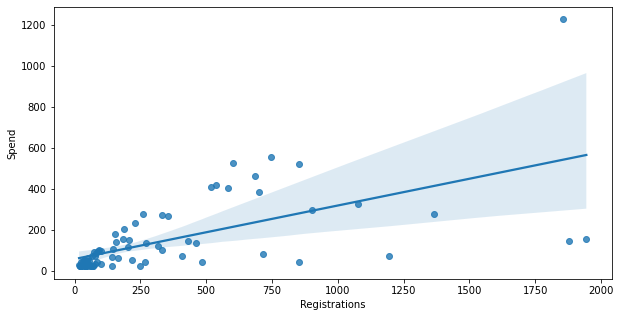

In [50]:
#уберем выбросы
data_model = data[(data['Registrations'] <= data['Registrations'].quantile(0.95)) & (data['Registrations'] >= data['Registrations'].quantile(0.05))]

x = data_model['Registrations'].values.reshape(-1,1)
y = data_model['Spend'].values
model1 = LinearRegression()
model1.fit(x,y)

plt.figure(figsize = (10,5))
sns.regplot(x,y)
plt.xlabel('Registrations')
plt.ylabel('Spend')

In [ ]:
@КАКОВА СВЯЗЬ МЕЖДУ ЧИСЛОМ КЛИКОВ И ЧИСЛОМ РЕГИСТРАЦИЙ?

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0, 0.5, 'Registrations')

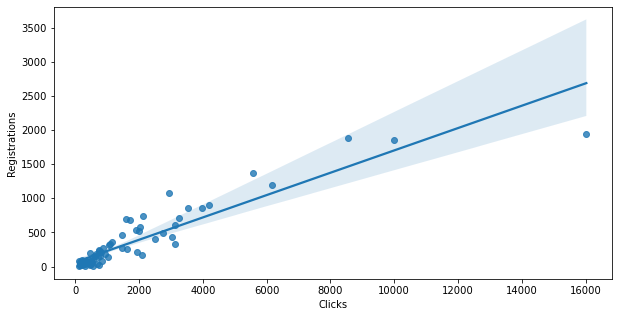

In [14]:
#уберем выбросы
data_model2 = data[(data['Clicks'] <= data['Clicks'].quantile(0.95)) & (data['Clicks'] >= data['Clicks'].quantile(0.05))]

x = data_model['Clicks'].values.reshape(-1,1)
y = data_model['Registrations'].values
model2 = LinearRegression()
model2.fit(x,y)

plt.figure(figsize = (10,5))
sns.regplot(x,y)
plt.xlabel('Clicks')
plt.ylabel('Registrations')

In [ ]:
@КАКИЕ КАМПАНИИ ПРИВЛЕКАЮТ БОЛЬШЕ ПОКУПАТЕЛЕЙ?

In [54]:
table = data.groupby('Campaign_id', as_index = False).aggregate({'Payers30d' : 'sum', 'Payers7d' : 'sum', 'Payers1d' : 'sum'}).sort_values('Payers30d', ascending = False).head(10)
table['customer_retention'] = table['Payers30d']-table['Payers1d']
table.sort_values('customer_retention', ascending = False)

,Campaign_id,Payers30d,Payers7d,Payers1d,customer_retention
0,1,83,79,64,19
1,2,22,19,17,5
8,9,10,9,6,4
10,11,10,8,6,4
15,16,6,5,2,4
2,3,6,6,4,2
4,5,6,5,4,2
3,4,12,12,11,1
13,14,6,6,5,1
23,24,5,5,4,1


In [ ]:
@КАКИЕ КАМПАНИИ НЕ ПРИВЛЕКЛИ ПОКУПАТЕЛЕЙ?

In [22]:
#new = data[(data['Payers1d'] == 0) & (data['Payers7d'] == 0) & (data['Payers30d'] == 0)][['Campaign_id', 'Buyer', 'Spend']]
#new.Campaign_id.tolist()

data[(data['Payers1d'] == 0) & (data['Payers7d'] == 0) & (data['Payers30d'] == 0)][['Campaign_id', 'Buyer', 'Spend']]

,Campaign_id,Buyer,Spend
9,10,buyer_2,416.130001
20,21,buyer_5,204.389999
25,26,buyer_5,147.970001
31,32,buyer_2,122.019999
33,34,buyer_2,105.849998
34,35,buyer_4,99.580000
35,36,buyer_1,98.359999
36,37,buyer_5,96.740000
37,38,buyer_1,93.789999
39,40,buyer_2,87.160000


In [ ]:
@ЕСТЬ ЛИ УБЫТОЧНЫЕ КАМПАНИИ?

In [23]:
data[(data['Revenue_ad7d'] == 0) & (data['Revenue_in_app7d'] == 0)]
data[(data['Revenue_ad30d'] == 0) & (data['Revenue_in_app30d'] == 0)]

,Campaign_id,Geo,Buyer,Impressions,Clicks,Installs,Registrations,Spend,Revenue_ad1d,Revenue_in_app1d,...,RPC_30d,RPC_7d,CR_registr,CR_clicks,CPR,payback_30,payback_7,ratio,CPI,Registr_to_Clicks


In [ ]:
@ЕСТЬ ЛИ АБСОЛЮТНО БЕЗРЕЗУЛЬТАТИВНЫЕ КАМПАНИИ?
@не привели к регистрациям

In [32]:
data[data['Registrations'] == 0]

,Campaign_id,Geo,Buyer,Impressions,Clicks,Installs,Registrations,Spend,Revenue_ad1d,Revenue_in_app1d,...,RPC_30d,RPC_7d,CR_registr,CR_clicks,CPR,payback_30,payback_7,ratio,CPI,Registr_to_Clicks


In [ ]:
@КАКИЕ КАМПАНИИ НАИМЕНЕЕ РЕЗУЛЬТАТИВНЫ?
@то есть привлекли наименьшее количество регистраций

In [24]:
data[data['Registrations'] <= data['Registrations'].quantile(0.05)]

,Campaign_id,Geo,Buyer,Impressions,Clicks,Installs,Registrations,Spend,Revenue_ad1d,Revenue_in_app1d,...,RPC_30d,RPC_7d,CR_registr,CR_clicks,CPR,payback_30,payback_7,ratio,CPI,Registr_to_Clicks
64,65,north america,buyer_1,23016,549,253,11,27.900000,0.392906,0.0,...,0.001104,0.001079,0.000478,0.023853,2.536364,-0.978270,-0.978772,0.021730,0.110277,0.020036
66,67,north america,buyer_2,3095,102,47,15,27.010000,9.014519,0.0,...,0.167386,0.120939,0.004847,0.032956,1.800667,-0.367887,-0.543290,0.632113,0.574681,0.147059
67,68,north america,buyer_2,3815,117,72,2,25.760000,0.368663,0.0,...,0.003151,0.003151,0.000524,0.030668,12.880000,-0.985689,-0.985689,0.014311,0.357778,0.017094
79,80,western europe,buyer_2,8981,298,160,4,21.950001,0.511279,0.0,...,0.002737,0.001716,0.000445,0.033181,5.487500,-0.962840,-0.976707,0.037160,0.137188,0.013423
80,81,australia oceania,buyer_5,2185,53,10,9,21.549999,1.187304,0.0,...,0.022880,0.022880,0.004119,0.024256,2.394444,-0.943728,-0.943728,0.056272,2.155000,0.169811


In [ ]:
@КАКИЕ КАМПАНИИ ОКАЗАЛИСЬ НАИБОЛЕЕ КЛИКАБЕЛЬНЫМИ?

In [56]:
#CTR (Click-Through Rate), показатель кликабельности = клики/показы
data['CTR'] = data['Clicks']/data['Impressions']

data.groupby('Campaign_id', as_index = False).aggregate({'CTR' : 'mean'}).sort_values('CTR', ascending = False).head(10)

,Campaign_id,CTR
23,24,0.079362
52,53,0.064620
46,47,0.056383
44,45,0.054305
78,79,0.051225
43,44,0.048571
37,38,0.047327
33,34,0.046589
3,4,0.046335
63,64,0.042406


In [ ]:
@КАКИЕ КАМПАНИИ ОКАЗАЛИСЬ НАИМЕНЕЕ КЛИКАБЕЛЬНЫМИ?

In [57]:
data.groupby('Campaign_id', as_index = False).aggregate({'CTR' : 'mean'}).sort_values('CTR', ascending = True).head(10)

,Campaign_id,CTR
71,72,0.010080
50,51,0.010659
58,59,0.011813
83,84,0.012802
84,85,0.013055
61,62,0.013796
62,63,0.014454
81,82,0.014696
12,13,0.015985
31,32,0.017054
